# This is a notebook for module 2 - ML

## 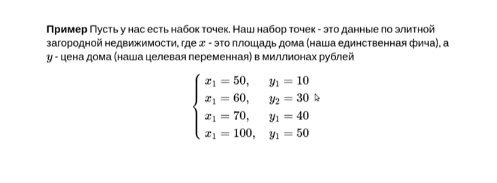

In [72]:
import pandas as pd
import numpy as np
from sympy import * 
from matplotlib import pyplot as plt

In [73]:
area = np.array([50, 60, 70, 100])
prices = np.array([10, 30, 40, 50])
X = np.array([
             [1, 50],
             [1, 60],
             [1, 70],
             [1, 100]])
df = pd.DataFrame({'area': area, 'price': prices})
df

,area,price
0,50,10
1,60,30
2,70,40
3,100,50


In [74]:
X

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [75]:
# wake up vector Y - prices
Y = prices
Y

array([10, 30, 40, 50])

In [83]:
# multiplay matrix in numpy
X_T_X = X.T.dot(X)
# find inverted matrix in numpy
X_T_X_inverted = np.linalg.inv(X_T_X)
X_T_X_inverted
w1, w2  = X_T_X_inverted.dot(X.T).dot(Y)
w1, w2

(-17.499999999999957, 0.7142857142857137)

0.714285714285714*x0 + 17.5*x1

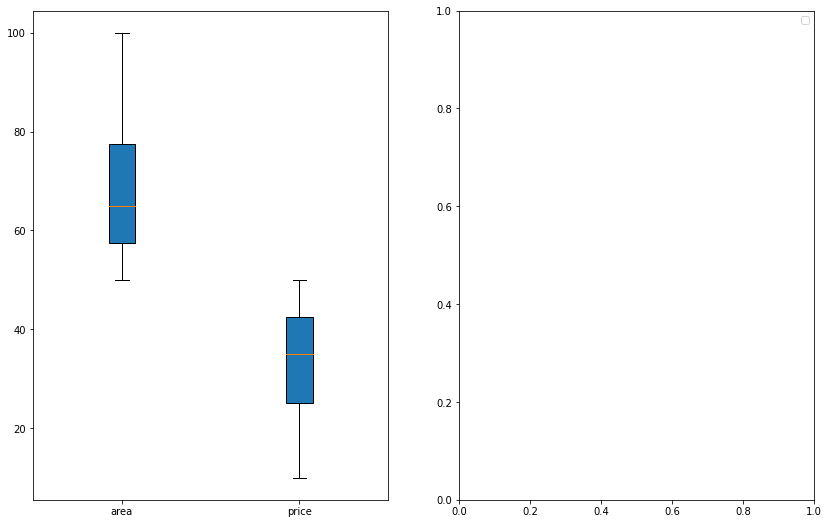

In [43]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))
box_plot1 = ax1.boxplot([df['area'], df['price']],
                        vert=True,
                        patch_artist=True,
                        labels=['area', 'price'])
plt.legend('Boxplot for feater Area and price')

In [11]:
df['area']

0     50
1     60
2     70
3    100
Name: area, dtype: int64

<AxesSubplot:>

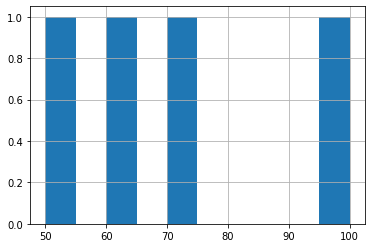

In [14]:
df['area'].hist()

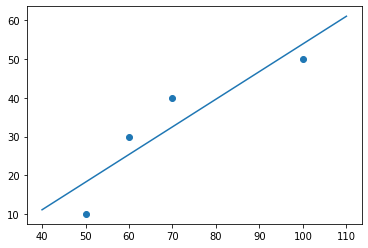

In [92]:
# visulation our features
plt.scatter(df['area'], df['price'])

margin = 10
X_min = X[:, 1].min()-margin
X_max = X[:, 1].max()+margin
X_support = np.linspace(X_min, X_max, num=100)

Y_model = w1 + w2 * X_support

plt.plot(X_support, Y_model)
plt.show()

In [97]:
x1, x0  = symbols('x1, x0')
yf = w1 * x0 + w2 * x1
yf

-17.5*x0 + 0.714285714285714*x1